In [153]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#plotting packages
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import plotly.express as px 

from time import time


## Introducing the dataset
In order to generate the fake reviews, GPT-2 has been applied to the publicly available Amazon Review Data (2018) dataset, which is extensive and reputable. For the dataset only the Top-10 Amazon categories with the
most product reviews have been considered, accounting for 88.4% of the reviews in the baseline dataset. For each product category, 2000 reviews have been generated

## Data Exploration

In [154]:
dataset_path = 'fake_reviews_dataset.csv'
header_names=['category','rating','label','text']
dataset=pd.read_csv(dataset_path,names = header_names)
dataset.head(5)

category  rating label  \
0  Home_and_Kitchen_5     5.0    CG   
1  Home_and_Kitchen_5     5.0    CG   
2  Home_and_Kitchen_5     5.0    CG   
3  Home_and_Kitchen_5     1.0    CG   
4  Home_and_Kitchen_5     5.0    CG   

                                                text  
0  Love this!  Well made, sturdy, and very comfor...  
1  love it, a great upgrade from the original.  I...  
2  This pillow saved my back. I love the look and...  
3  Missing information on how to use it, but it i...  
4  Very nice set. Good quality. We have had the s...

In [155]:
dataset.tail(5)

category  rating label  \
40427  Clothing_Shoes_and_Jewelry_5     4.0    OR   
40428  Clothing_Shoes_and_Jewelry_5     5.0    CG   
40429  Clothing_Shoes_and_Jewelry_5     2.0    OR   
40430  Clothing_Shoes_and_Jewelry_5     1.0    CG   
40431  Clothing_Shoes_and_Jewelry_5     5.0    OR   

                                                    text  
40427  I had read some reviews saying that this bra r...  
40428  I wasn't sure exactly what it would be. It is ...  
40429  You can wear the hood by itself, wear it with ...  
40430  I liked nothing about this dress. The only rea...  
40431  I work in the wedding industry and have to wor...

In [156]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text      40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [157]:
# We take a look at descriptive statistics
dataset.describe(include='all')

category        rating  label  \
count            40432  40432.000000  40432   
unique              10           NaN      2   
top     Kindle_Store_5           NaN     OR   
freq              4730           NaN  20216   
mean               NaN      4.256579    NaN   
std                NaN      1.144354    NaN   
min                NaN      1.000000    NaN   
25%                NaN      4.000000    NaN   
50%                NaN      5.000000    NaN   
75%                NaN      5.000000    NaN   
max                NaN      5.000000    NaN   

                                                     text  
count                                               40432  
unique                                              40412  
top     These are very comfortable.  They have the wid...  
freq                                                    2  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

In [158]:
# Differentiating between nominal, binary, and numeric features

col_names = np.array(header_names)

nominal_idx = [0, 3]
# label is binary because we can have only two label
binary_idx = 2
numeric_idx = 1

nominal_cols = col_names[nominal_idx].tolist()
binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

In [159]:
# We check that there no null values
dataset.isna().sum()

category    0
rating      0
label       0
text        0
dtype: int64

In [160]:
# We check that the dataset is actually balanced as told in the documentation
dataset.label.value_counts()

OR    20216
CG    20216
Name: label, dtype: int64

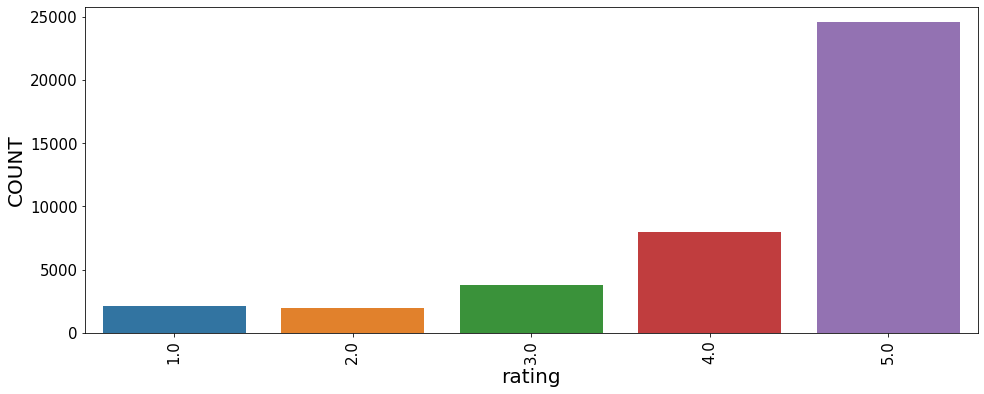

In [161]:
dataset_to_plot = dataset.copy()  # not modify raw dataframe, freedom to apply modification for the plot

# We want to have an idea of the distribution of the ratings ...

var = 'rating'
plt.figure(figsize = (16,6))
ax = sns.countplot(x=var, data=dataset_to_plot);
plt.xticks(rotation = 90,fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(var,fontsize = 20)
plt.ylabel('COUNT',fontsize = 20);

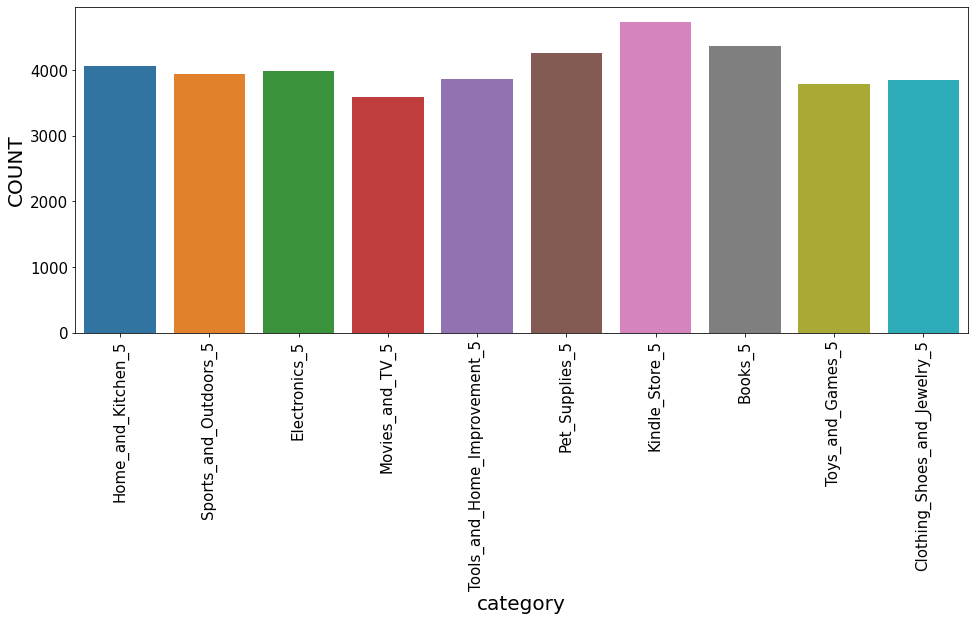

In [162]:
d_plot = dataset.copy()  # not modify raw dataframe, freedom to apply modification for the plot

# ... and the distribution of the categories

var = 'category'
plt.figure(figsize = (16,6))
ax = sns.countplot(x=var, data=d_plot);
plt.xticks(rotation = 90,fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel(var,fontsize = 20)
plt.ylabel('COUNT',fontsize = 20);

In [163]:
# We want to understand how the data behave with the increasing index

d_plot['label_as_num']=d_plot['label']
d_plot['label_as_num'].replace(['OR', 'CG'],[0, 1], inplace=True)
px.scatter(d_plot['label_as_num'],  color=d_plot['label'])

We can see that the labels do not cluster in some space of the index

In [164]:
d_plot['cat_as_num']=d_plot['category']
px.scatter(d_plot['cat_as_num'],  color=d_plot['category'])

In [165]:
d_plot['rat_as_num']=d_plot['rating']
px.scatter(d_plot['rat_as_num'],  color=d_plot['rating'])

In [166]:
# We check if each rating has a balanced number of CG and OR reviews

fig = px.histogram(dataset, x='rating', color='label')
fig.update_xaxes(range=[0, 5])
fig.show()

We can notice that the number of reviews for each rating is almost equal for the two labels

In [167]:
# We check if each category has a balanced number of CG and OR reviews

fig = px.histogram(dataset, x='category', color='label')
fig.update_xaxes(range=[0, 5])
fig.show()

We can notice that every category has the same number of CG and OR reviews

## Data Preprocessing

In [168]:
# Data cleaning: removing duplicates

print(len(dataset))
dataset.drop_duplicates(inplace=True)
print(len(dataset))

40432
40420


12 objects have been removed. This number is not relevant wrt to the balancing of the dataset because too small.

In [169]:
from sklearn.model_selection import train_test_split
# We divide feature matrix X and target vector y



# target vector 
y = dataset.iloc[:, 2].values
y = np.where(y == 'CG', 1, 0)
print(y)
print(f"y.shape = {y.shape}")

# We split the dataset in training set e test set

test_size=0.3 #0.1
X_train, X_test, y_train, y_test = train_test_split(dataset.text, y, test_size=test_size, random_state=0, shuffle=False)

# SANITY CHECK Distribution
unique, counts = np.unique(y_train, return_counts=True)
print(unique, counts, dict(zip(unique,counts)))

# SANITY CHECK Distribution
unique, counts = np.unique(y_test, return_counts=True)
print(unique, counts, dict(zip(unique,counts)))


[1 1 1 ... 0 1 0]
y.shape = (40420,)
[0 1] [14150 14144] {0: 14150, 1: 14144}
[0 1] [6065 6061] {0: 6065, 1: 6061}


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gianmarco/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /home/gianmarco/nltk_data...
[nltk_data]   Package words is already up-to-date!


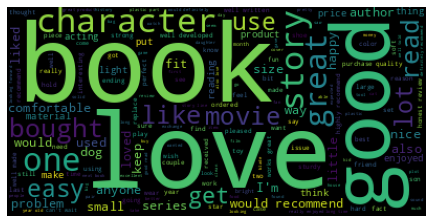

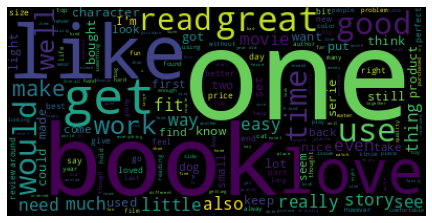

In [181]:
import nltk
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('words')

stopwords=nltk.corpus.stopwords.words('english')
complete_text=' '.join(dataset[dataset['label']=='CG'].text)

wc=WordCloud(stopwords=stopwords, background_color='black', max_words=200).generate(complete_text)

plt.figure(figsize=(7.5,5))
plt.clf()
plt.imshow(wc)
plt.axis('off')
plt.show()

complete_text=' '.join(dataset[dataset['label']=='OR'].text)

wc=WordCloud(stopwords=stopwords, background_color='black', max_words=200).generate(complete_text)

plt.figure(figsize=(7.5,5))
plt.clf()
plt.imshow(wc)
plt.axis('off')
plt.show()

In [171]:
# Data preprocessing: remove all useless meta information, tokenization, stop-word filtering

from sklearn.feature_extraction.text import TfidfVectorizer

# setting max features improves the results 
vectorizer = TfidfVectorizer(stop_words = stopwords,token_pattern=r'(?u)\b[A-Za-z]+\b',max_features=4000)
X_train_vector = vectorizer.fit_transform(X_train) # fit on training data, trasform training data
X_test_vector = vectorizer.transform(X_test)

['love', 'well', 'made', 'sturdy', 'comfortable', 'love', 'pretty']
['love', 'great', 'upgrade', 'original', 'mine', 'couple', 'year']
['pillow', 'saved', 'back', 'love', 'look', 'feel', 'pillow']
['missing', 'information', 'use', 'great', 'product', 'price']
['nice', 'set', 'good', 'quality', 'set', 'two', 'month']


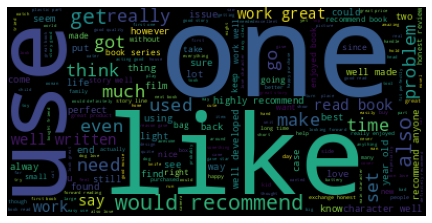

In [172]:
import re

text_analyzer = vectorizer.build_analyzer()

# Data preprocessing: stemming

# from nltk.stem.snowball import SnowballStemmer
# stemmer = SnowballStemmer('english')

# from nltk.stem.lancaster import LancasterStemmer
# stemmer = LancasterStemmer()

# stemmer=nltk.PorterStemmer()

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def analyzer(doc):
    return [lemmatizer.lemmatize(w) for w in text_analyzer(doc)]

# def analyzer(doc):
#     return [stemmer.stem(w) for w in text_analyzer(doc)]

for i in range(5):
    print(analyzer(dataset.text[i]))

## Data Processing

In [173]:
from sklearn.model_selection import StratifiedKFold

n_folds = 10
skf = StratifiedKFold(n_folds)

def print_metrics(alg,results):
    metrics = ['accuracy','precision', 'recall']
    print(f'\n{alg}\n')
    for metric in metrics:
        print(f'{metric:15}', np.round(results["test_"+metric].mean(),3), [np.round(elem,3) for elem in results["test_"+metric]])
    print()
    print(f'{"vocabulary size":15}', np.mean([len(results['estimator'][i][0].vocabulary_) for i in range(n_folds)]))
    print(f'{"fit_time":15}', np.round(results["fit_time"].mean()))
    print(f'{"score_time":15}', np.round(results["score_time"].mean()))

In [174]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,precision_score,recall_score, accuracy_score, make_scorer, f1_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.pipeline import Pipeline
from time import time
from tqdm import tqdm

comp_res=pd.DataFrame()


start = time()
pipe = Pipeline([('vect', TfidfVectorizer(analyzer = analyzer)),
                ('clf', MultinomialNB())])
res = cross_validate(pipe,
                        dataset.text.values,
                        y,
                        scoring = {'precision': make_scorer(precision_score,pos_label = 1),                         
                                    'recall': make_scorer(recall_score,pos_label = 1),
                                    'accuracy': make_scorer(accuracy_score)},
                        return_estimator = True,
                        cv = skf,
                        n_jobs = -1) # Number of jobs to run in parallel. 
                                    # Training the estimator and computing the score are parallelized over the cross-validation splits.
print_metrics('MNB',res)
elapsed = time()-start
print(elapsed)
comp_res['MNB']=res['test_accuracy']


MNB

accuracy        0.822 [0.841, 0.844, 0.786, 0.782, 0.82, 0.822, 0.863, 0.826, 0.822, 0.81]
precision       0.827 [0.848, 0.851, 0.866, 0.828, 0.829, 0.833, 0.83, 0.805, 0.809, 0.774]
recall          0.815 [0.831, 0.834, 0.676, 0.711, 0.806, 0.806, 0.912, 0.859, 0.842, 0.875]

vocabulary size 32168.1
fit_time        16.0
score_time      2.0
53.52048468589783


In [175]:
start = time()
pipe = Pipeline([('vect', TfidfVectorizer(analyzer = analyzer)),
                ('clf', LinearSVC())])
res = cross_validate(pipe,
                        dataset.text.values,
                        y,
                        scoring = {'precision': make_scorer(precision_score,pos_label = 1),                         
                                    'recall': make_scorer(recall_score,pos_label = 1),
                                    'accuracy': make_scorer(accuracy_score)},
                        return_estimator = True,
                        cv = skf,
                        n_jobs = -1) # Number of jobs to run in parallel. 
                                    # Training the estimator and computing the score are parallelized over the cross-validation splits.
print_metrics('LSVC',res)
elapsed = time()-start
print(elapsed)
comp_res['LSVC']=res['test_accuracy']


LSVC

accuracy        0.842 [0.85, 0.864, 0.809, 0.828, 0.849, 0.853, 0.878, 0.846, 0.821, 0.821]
precision       0.873 [0.881, 0.9, 0.898, 0.872, 0.867, 0.877, 0.871, 0.858, 0.858, 0.85]
recall          0.8 [0.81, 0.819, 0.697, 0.767, 0.826, 0.821, 0.888, 0.828, 0.769, 0.78]

vocabulary size 32168.1
fit_time        13.0
score_time      1.0
40.18594789505005



LR

accuracy        0.839 [0.852, 0.866, 0.8, 0.802, 0.845, 0.854, 0.874, 0.836, 0.823, 0.835]
precision       0.891 [0.898, 0.912, 0.921, 0.893, 0.876, 0.891, 0.872, 0.877, 0.907, 0.862]
recall          0.773 [0.794, 0.81, 0.657, 0.687, 0.804, 0.805, 0.875, 0.782, 0.719, 0.799]

vocabulary size 32168.1
fit_time        14.0
score_time      1.0
41.97460651397705


<AxesSubplot:>

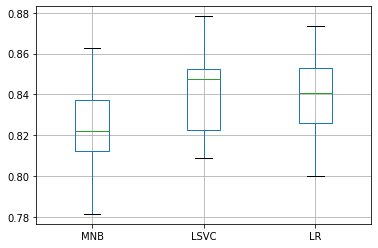

In [176]:
start = time()
pipe = Pipeline([('vect', TfidfVectorizer(analyzer = analyzer)),
                ('clf', LogisticRegression())])
res = cross_validate(pipe,
                        dataset.text.values,
                        y,
                        scoring = {'precision': make_scorer(precision_score,pos_label = 1),                         
                                    'recall': make_scorer(recall_score,pos_label = 1),
                                    'accuracy': make_scorer(accuracy_score)},
                        return_estimator = True,
                        cv = skf,
                        n_jobs = -1) # Number of jobs to run in parallel. 
                                    # Training the estimator and computing the score are parallelized over the cross-validation splits.
print_metrics('LR',res)
elapsed = time()-start
print(elapsed)
comp_res['LR']=res['test_accuracy']
comp_res.boxplot()

In [177]:
# start = time()
# pipe = Pipeline([('vect', TfidfVectorizer(analyzer = stem_analyzer)),
#                 ('clf', DecisionTreeClassifier())])
# res = cross_validate(pipe,
#                         dataset.text.values,
#                         y,
#                         scoring = {'precision': make_scorer(precision_score,pos_label = 1),                         
#                                     'recall': make_scorer(recall_score,pos_label = 1),
#                                     'accuracy': make_scorer(accuracy_score)},
#                         return_estimator = True,
#                         cv = skf,
#                         n_jobs = -1) # Number of jobs to run in parallel. 
#                                     # Training the estimator and computing the score are parallelized over the cross-validation splits.
# print_metrics('DT',res)
# elapsed = time()-start
# print(elapsed)
# comp_res['DT']=res

In [178]:
mnb = MultinomialNB()
mnb.fit(X_train_vector, y_train)
y_pred = mnb.predict(X_test_vector)

# Print results
print(classification_report(y_test, y_pred, target_names=['Fake', 'Real']))
print('Classification accuracy {:.1%}'.format(accuracy_score(y_test, y_pred)))

# https://www.amazon.com/Samsung-Galaxy-S21-5G-Version/product-reviews/B08VLMQ3KS/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
real_review="Amazing purchase. It came earlier than expected & it was in PERFECT CONDITION. I paid for a phone in fair condition & got a phone in PERCECT condition. I was SHOCKED. I waiting a while before posting a review cause I wanted to make sure it didn't have any glitches. Nope. It's perfect. It's like a new phone. It came with a tempered glass already installed and a charger but the charger isn't a fast charger but that's okay cause I already had a charger. 10/10 would recommend."

#Chat-GPT
fake_review="The phone is a great option for those looking for a well-rounded smartphone. The device boasts a large and vibrant display, excellent performance, and a reliable camera system. The battery life is also impressive, easily lasting a full day of heavy usage. On the downside, the phone can be a bit slippery and the fingerprint sensor can be slow to register. Overall, the phone is a fantastic choice for anyone in the market for a new phone."

print(mnb.predict(vectorizer.transform(pd.Series([real_review]))))
print(mnb.predict(vectorizer.transform(pd.Series([fake_review]))))


              precision    recall  f1-score   support

        Fake       0.81      0.82      0.81      6065
        Real       0.81      0.81      0.81      6061

    accuracy                           0.81     12126
   macro avg       0.81      0.81      0.81     12126
weighted avg       0.81      0.81      0.81     12126

Classification accuracy 81.1%
[0]
[1]
